# Relatório sobre os dados do COVID-19

#### Nesse relatório serão analisados os dados de COVID-19 de todos os países do mundo.

In [114]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [115]:
# Importando a base de dados em um dataframe

dados = pd.read_csv('owid-covid-data.csv')
dados.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [116]:
# Verificando as informações do dataframe

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167246 entries, 0 to 167245
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    167246 non-null  object 
 1   continent                                   157238 non-null  object 
 2   location                                    167246 non-null  object 
 3   date                                        167246 non-null  object 
 4   total_cases                                 164205 non-null  float64
 5   new_cases                                   164074 non-null  float64
 6   new_cases_smoothed                          162088 non-null  float64
 7   total_deaths                                146327 non-null  float64
 8   new_deaths                                  146371 non-null  float64
 9   new_deaths_smoothed                         144267 non-null  float64
 

In [117]:
# Pode-se observar que muitas colunas possuem dados nulos, então deve-se tomar cuidado para não influenciar a análise dos dados.
# Optou-se por não alterar os valores nulos por 0 pois alteraria os gráficos de análise.

dados.isnull().sum().sort_values(ascending = False)

weekly_icu_admissions_per_million          161767
weekly_icu_admissions                      161767
excess_mortality_cumulative_per_million    161499
excess_mortality                           161499
excess_mortality_cumulative                161499
                                            ...  
total_cases                                  3041
population                                   1079
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [118]:
# Verificando os tipos de cada variável
dados.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [119]:
# Foi verificado que a variável date é do tipo object, é necessário muda-la para datetime.

dados.date = pd.to_datetime(dados.date)

In [120]:
# Verificando se a alteração funcionou

dados.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [121]:
# Vamos verificar a distribuição do dataframe

dados.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.642050e+05,1.640740e+05,1.620880e+05,1.463270e+05,146371.000000,144267.000000,163443.000000,163312.000000,161332.000000,145578.000000,...,106634.000000,105171.000000,68949.000000,124344.000000,156129.000000,137009.000000,5.747000e+03,5747.000000,5747.000000,5747.000000
mean,2.568497e+06,1.167478e+04,1.166897e+04,5.800445e+04,170.896428,172.495618,29965.821061,168.844328,168.008370,513.093426,...,10.626912,32.778790,50.785856,3.027670,73.575802,0.725570,3.822301e+04,9.478975,15.992426,985.436167
std,1.566758e+07,8.499305e+04,8.310365e+04,3.038437e+05,831.211421,816.159303,53063.124648,692.489172,539.396047,788.985254,...,10.557881,13.524206,31.811314,2.449961,7.491370,0.149961,1.059208e+05,16.469687,30.056700,1434.548662
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.028000e+03,1.000000e+00,7.000000e+00,8.000000e+01,0.000000,0.143000,629.133500,0.042000,1.633000,18.715000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-6.730000e+01,-0.680000,-0.745000,-28.581156
50%,2.640000e+04,7.900000e+01,1.075710e+02,7.860000e+02,2.000000,2.429000,4800.685000,11.468000,18.953500,129.856000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.482200e+03,6.130000,7.230000,478.555739
75%,3.024660e+05,1.068000e+03,1.156179e+03,7.343000e+03,20.000000,21.286000,38396.325000,101.813250,121.889000,718.619000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.568215e+04,14.595000,23.015000,1667.347537
max,4.515965e+08,4.206325e+06,3.444246e+06,6.022057e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6332.605000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.111864e+06,111.010000,375.000000,9153.060433


### Não utilizaremos todos os dados na análise, então vamos criar um novo dataframe com alguns dados que são mais úteis para a pesquisa

In [122]:
# Realizando a primeira filtragem dos dados, diminuindo consideravelmente o número de colunas do dataframe.

dados_new = pd.DataFrame(dados[['location','date','total_cases','total_deaths','icu_patients','hosp_patients',
                                'total_vaccinations','people_vaccinated','people_fully_vaccinated','population',
                                'human_development_index']])
dados_new

,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,human_development_index
0,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.511
1,Afghanistan,2020-02-25,5.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.511
2,Afghanistan,2020-02-26,5.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.511
3,Afghanistan,2020-02-27,5.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.511
4,Afghanistan,2020-02-28,5.0,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.511
...,...,...,...,...,...,...,...,...,...,...,...
167241,Zimbabwe,2022-03-05,239019.0,5397.0,NaN,NaN,7936145.0,4377373.0,3410340.0,15092171.0,0.571
167242,Zimbabwe,2022-03-06,239209.0,5399.0,NaN,NaN,7938362.0,4378029.0,3410960.0,15092171.0,0.571
167243,Zimbabwe,2022-03-07,239710.0,5399.0,NaN,NaN,7943325.0,4379875.0,3412556.0,15092171.0,0.571
167244,Zimbabwe,2022-03-08,240343.0,5400.0,NaN,NaN,NaN,NaN,NaN,15092171.0,0.571


In [123]:
# Verificando as informações do dataframe.
dados_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167246 entries, 0 to 167245
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   location                 167246 non-null  object        
 1   date                     167246 non-null  datetime64[ns]
 2   total_cases              164205 non-null  float64       
 3   total_deaths             146327 non-null  float64       
 4   icu_patients             23572 non-null   float64       
 5   hosp_patients            24711 non-null   float64       
 6   total_vaccinations       45560 non-null   float64       
 7   people_vaccinated        43321 non-null   float64       
 8   people_fully_vaccinated  40593 non-null   float64       
 9   population               166167 non-null  float64       
 10  human_development_index  137009 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 14.0+ MB


In [124]:
# Verificando qual a data mais recente dos dados obtidos para verificar o nivel de atualização da base de dados

dados_new.sort_values('date', ascending = False)

# Pode-se observar que o dia mais recente é 2022-03-09

,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,human_development_index
167245,Zimbabwe,2022-03-09,240343.0,5400.0,NaN,NaN,NaN,NaN,NaN,15092171.0,0.571
95861,Mali,2022-03-09,30402.0,725.0,NaN,NaN,NaN,NaN,NaN,20855724.0,0.434
162315,Vatican,2022-03-09,29.0,NaN,NaN,NaN,NaN,NaN,NaN,812.0,NaN
14141,Barbados,2022-03-09,56551.0,323.0,NaN,NaN,NaN,NaN,NaN,287708.0,0.814
92207,Macao,2022-03-09,82.0,NaN,NaN,NaN,NaN,NaN,NaN,658391.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
98545,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130262220.0,0.779
98544,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130262220.0,0.779
5887,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45605823.0,0.845
5886,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45605823.0,0.845


In [125]:
# Vamos verificar quantos registros encontramos do dia 2022-03-09

dados_new.loc[dados_new.date == '2022-03-09']

# Foram encontrados 228 registros desse dia

,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,human_development_index
744,Afghanistan,2022-03-09,175525.0,7636.0,NaN,NaN,NaN,NaN,NaN,3.983543e+07,0.511
1500,Africa,2022-03-09,11395732.0,250636.0,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN
2244,Albania,2022-03-09,272412.0,3483.0,NaN,NaN,NaN,NaN,NaN,2.872934e+06,0.795
2988,Algeria,2022-03-09,265346.0,6860.0,13.0,NaN,NaN,NaN,NaN,4.461663e+07,0.748
3726,Andorra,2022-03-09,38794.0,152.0,NaN,NaN,NaN,NaN,NaN,7.735400e+04,0.868
...,...,...,...,...,...,...,...,...,...,...,...
164325,Wallis and Futuna,2022-03-09,454.0,7.0,NaN,NaN,NaN,NaN,NaN,1.109400e+04,NaN
165104,World,2022-03-09,451596547.0,6022057.0,NaN,NaN,NaN,NaN,NaN,7.874966e+09,0.737
165803,Yemen,2022-03-09,11781.0,2138.0,NaN,NaN,NaN,NaN,NaN,3.049064e+07,0.470
166525,Zambia,2022-03-09,314641.0,3960.0,NaN,NaN,NaN,NaN,NaN,1.892066e+07,0.584


In [126]:
# Vamos verificar quantos países existem na coluna location

dados['location'].drop_duplicates()

# Foram encontrados 239 países, então no dia 2022-03-09, nem todos os países tiveram seus dados atualizados

0            Afghanistan
745               Africa
1501             Albania
2245             Algeria
2989             Andorra
               ...      
164326    Western Sahara
164327             World
165105             Yemen
165804            Zambia
166526          Zimbabwe
Name: location, Length: 239, dtype: object

In [127]:
# Vamos verificar os países com maior número de mortos

dados_new.groupby('location')['total_deaths'].max().sort_values(ascending = False).head(20)

# Pode-se observar que na coluna de países também estão englobados os dados do mundo e outros agrupamentos que não são países (por exemplo, continentes)

location
World                  6022057.0
Upper middle income    2457314.0
High income            2237420.0
Europe                 1734090.0
North America          1393360.0
Asia                   1370800.0
Lower middle income    1284443.0
South America          1265006.0
European Union         1024812.0
United States           963819.0
Brazil                  653767.0
India                   515355.0
Russia                  351124.0
Mexico                  320166.0
Africa                  250636.0
Peru                    211252.0
United Kingdom          162628.0
Italy                   156357.0
Indonesia               151135.0
France                  139842.0
Name: total_deaths, dtype: float64

##### Os 5 países com maior número de mortes são: Estados Unidos, Brasil, India, Russia e Mexico.

## Criando um novo dataframe com os dados dos 5 países com mais mortes

In [128]:
# Vamos ignorar os dados que não são de países e pegar os 5 primeiros países em mortes e criar um novo dataframe

dados_5_paises = dados[['location','total_cases','total_deaths','total_vaccinations','people_vaccinated',
                        'people_fully_vaccinated','total_cases_per_million','total_deaths_per_million', 'population']].loc[
    (dados.location == 'United States') | (dados.location == 'Brazil') | (dados.location == 'India') | 
    (dados.location == 'Russia') | (dados.location == 'Mexico')]

dados_5_paises = dados_5_paises.groupby('location')['total_cases','total_deaths','total_vaccinations','people_vaccinated',
                        'people_fully_vaccinated','total_cases_per_million','total_deaths_per_million', 'population'].max().astype(int)
dados_5_paises = dados_5_paises.sort_values('total_deaths', ascending = False)
dados_5_paises 

C:\Users\mateu\AppData\Local\Temp/ipykernel_11652/343477937.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dados_5_paises = dados_5_paises.groupby('location')['total_cases','total_deaths','total_vaccinations','people_vaccinated',


,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,total_deaths_per_million,population
location,,,,,,,,
United States,79406602,963819,555595418,254205456,215466571,238519,2895,332915074
Brazil,29198101,653767,397386286,178486274,156114741,136443,3055,213993441
India,42975883,515355,1791553063,967725805,804228336,30842,369,1393409033
Russia,16893631,351124,161246982,78770001,72124064,115779,2406,145912022
Mexico,5575608,320166,183509755,85340303,79110688,42802,2457,130262220


### Plotando um gráfico com o número de mortes de cada país

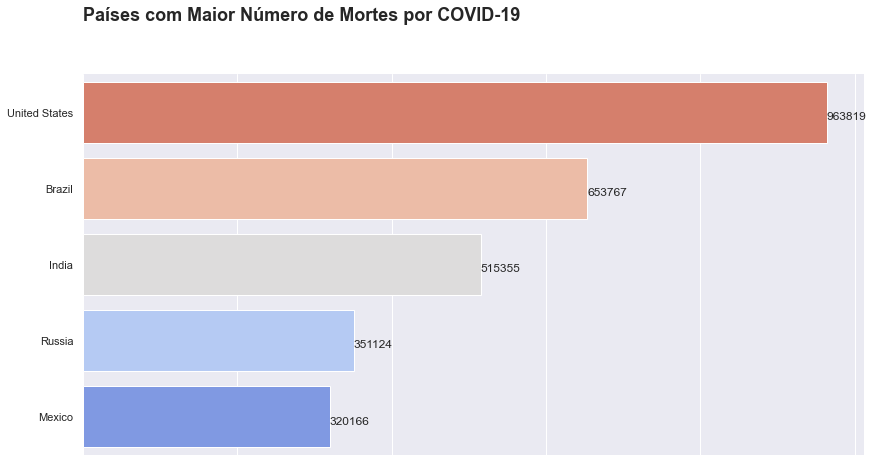

In [129]:
fig, ax = plt.subplots(figsize= (14,7))
n_plots = 5
palette = sns.color_palette("coolwarm", n_colors=n_plots)
palette.reverse()
with palette:
  ax = sns.barplot(y=dados_5_paises.index ,x='total_deaths', data=dados_5_paises)

  # Plotando título
  plt.text(-2, -1.2, 'Países com Maior Número de Mortes por COVID-19',
          fontsize=18, 
          
          weight='bold')

  initialx=0

  # Removendo os grids
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  # Removendo os titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
  # Adicionando os labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()

##### É possível observar que o Estados unidos ocupa o primeiro lugar, seguido por Brasil, India, Russia e Mexico



## Plotando um gráfico de mortes acumuladas durante a pandemia

In [130]:
list1 = pd.Series(dados.loc[dados.location == 'United States']['total_deaths'].values)
list2 = pd.Series(dados.loc[dados.location == 'Brazil']['total_deaths'].values)
list3 = pd.Series(dados.loc[dados.location == 'India']['total_deaths'].values)
list4 = pd.Series(dados.loc[dados.location == 'Russia']['total_deaths'].values)
list5 = pd.Series(dados.loc[dados.location == 'Mexico']['total_deaths'].values)

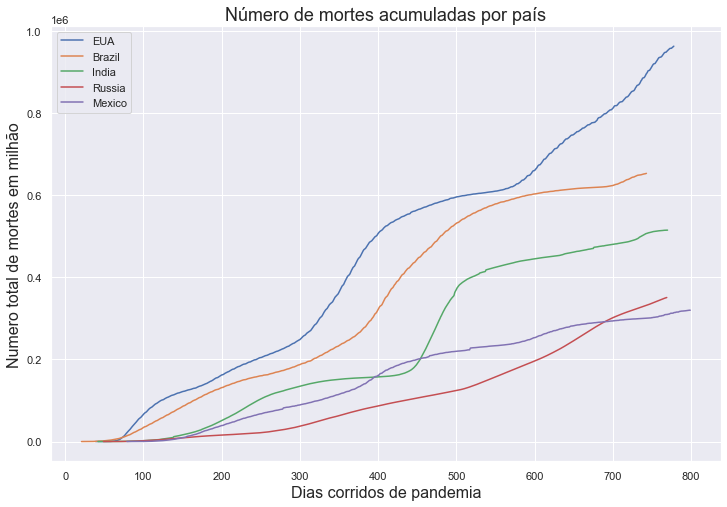

In [131]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

ax = sns.lineplot(x = range(1,779), y = list1, data = list1)
ax = sns.lineplot(x = range(1,744), y = list2, data = list2)
ax = sns.lineplot(x = range(1,771), y = list3, data = list3)
ax = sns.lineplot(x = range(1,770), y = list4, data = list4)
ax = sns.lineplot(x = range(1,800), y = list5, data = list5)

ax.set_xlabel('Dias corridos de pandemia', fontsize = 16)
ax.set_ylabel('Numero total de mortes em milhão', fontsize = 16)
ax.set_title('Número de mortes acumuladas por país',fontsize = 18)

ax.legend(['EUA','Brazil','India','Russia','Mexico'])

plt.show()

# Alguns países possuem menos dias de dados coletados do que outros, então usaremos o máximo de dias disponíveis para cada país.

###### É possível observar que mesmo a India sendo o país com mais habitantes, seu número de mortos se encontra abaixo de países como o EUA e Brasil.

## Plotando um gráfico para o total de pessoas vacinadas durante a pandemia

In [132]:
list6 = pd.Series(dados.loc[dados.location == 'United States']['people_vaccinated'].values)
list7 = pd.Series(dados.loc[dados.location == 'Brazil']['people_vaccinated'].values)
list8 = pd.Series(dados.loc[dados.location == 'India']['people_vaccinated'].values)
list9 = pd.Series(dados.loc[dados.location == 'Russia']['people_vaccinated'].values)
list10 = pd.Series(dados.loc[dados.location == 'Mexico']['people_vaccinated'].values)

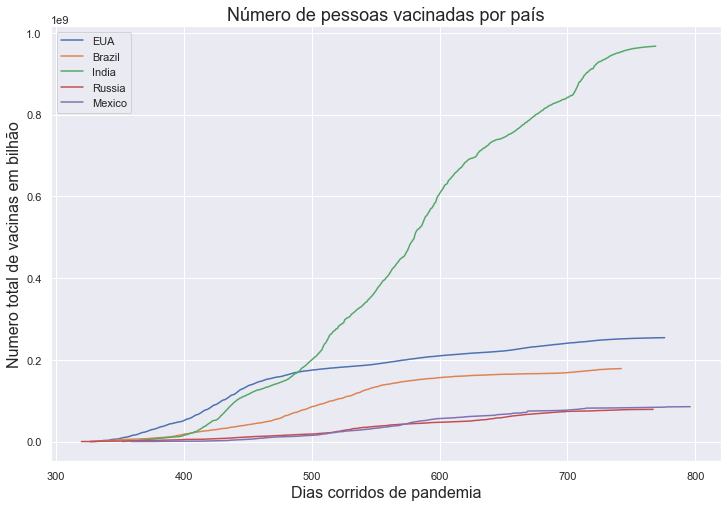

In [133]:
sns.set(rc={'figure.figsize':(12,8)})

ax = sns.lineplot(x = range(1,779), y = list6, data = list1)
ax = sns.lineplot(x = range(1,744) , y = list7, data = list2)
ax = sns.lineplot(x = range(1,771), y = list8, data = list3)
ax = sns.lineplot(x = range(1,770), y = list9, data = list4)
ax = sns.lineplot(x = range(1,800), y = list10, data = list5)

ax.set_xlabel('Dias corridos de pandemia', fontsize = 16)
ax.set_ylabel('Numero total de vacinas em bilhão', fontsize = 16)
ax.set_title('Número de pessoas vacinadas por país',fontsize = 18)

ax.legend(['EUA','Brazil','India','Russia','Mexico'])

plt.show()

## Vamos modificar nosso dataframe dos 5 países para que ele fique mais apresentável

In [134]:
dados_5_paises.head()

,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,total_deaths_per_million,population
location,,,,,,,,
United States,79406602,963819,555595418,254205456,215466571,238519,2895,332915074
Brazil,29198101,653767,397386286,178486274,156114741,136443,3055,213993441
India,42975883,515355,1791553063,967725805,804228336,30842,369,1393409033
Russia,16893631,351124,161246982,78770001,72124064,115779,2406,145912022
Mexico,5575608,320166,183509755,85340303,79110688,42802,2457,130262220


In [135]:
# Modificando os nomes das colunas para português

dados_5_paises.columns = ['Total de casos', 'Total de mortes', 'Total de vacinacoes', 'Pessoas vacinadas',
                          'Pessoas completamente vacinadas', 'Total de casos por milhao', 'Total de mortes por milhao',
                         'Populacao do país']
dados_5_paises

,Total de casos,Total de mortes,Total de vacinacoes,Pessoas vacinadas,Pessoas completamente vacinadas,Total de casos por milhao,Total de mortes por milhao,Populacao do país
location,,,,,,,,
United States,79406602,963819,555595418,254205456,215466571,238519,2895,332915074
Brazil,29198101,653767,397386286,178486274,156114741,136443,3055,213993441
India,42975883,515355,1791553063,967725805,804228336,30842,369,1393409033
Russia,16893631,351124,161246982,78770001,72124064,115779,2406,145912022
Mexico,5575608,320166,183509755,85340303,79110688,42802,2457,130262220


In [136]:
# Modificando o nome do íncide para português

dados_5_paises ['Paises'] = ['United States','Brazil','India','Russia','Mexico']
dados_5_paises = dados_5_paises.set_index ('Paises')
dados_5_paises

,Total de casos,Total de mortes,Total de vacinacoes,Pessoas vacinadas,Pessoas completamente vacinadas,Total de casos por milhao,Total de mortes por milhao,Populacao do país
Paises,,,,,,,,
United States,79406602,963819,555595418,254205456,215466571,238519,2895,332915074
Brazil,29198101,653767,397386286,178486274,156114741,136443,3055,213993441
India,42975883,515355,1791553063,967725805,804228336,30842,369,1393409033
Russia,16893631,351124,161246982,78770001,72124064,115779,2406,145912022
Mexico,5575608,320166,183509755,85340303,79110688,42802,2457,130262220


## Plotando um gráfico da população em relação ao número total de casos

Text(0.5, 1.0, 'População em relação ao número total de casos de cada país')

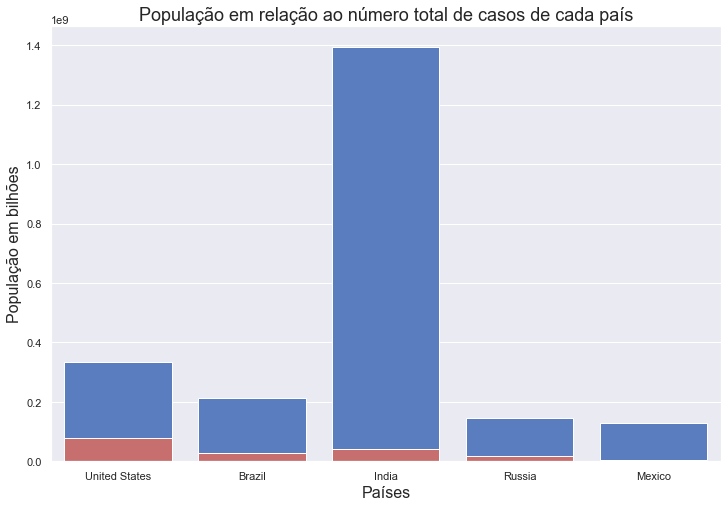

In [137]:
sns.set_color_codes("muted")
ax = sns.barplot(x=dados_5_paises.index, y="Populacao do país", data= dados_5_paises, color="b")
ax = sns.barplot(x=dados_5_paises.index, y="Total de casos", data= dados_5_paises, color="r")
ax.set_xlabel('Países', fontsize = 16)
ax.set_ylabel('População em bilhões', fontsize = 16)
ax.set_title('População em relação ao número total de casos de cada país', fontsize = 18)

###### Pode-se observar no gráfico a relação entre o total de habitantes dos paises (em azul) e o total de casos (em vermelho)
###### O México possui tão poucos casos em relacão ao tamanho total do gráfico que não aparece no gráfico, mas as porcentagens podem ser conferidas a seguir

## Verificando a porcentagem de pessoas infectadas por país

In [138]:
# Verificando a porcentagem de pessoas infectadas nos Estados Unidos

percentual_estados_unidos = float(((dados_5_paises.loc[dados_5_paises.index == 'United States']['Total de casos'] /
                             dados_5_paises.loc[dados_5_paises.index == 'United States']['Populacao do país']).values)) *100 
print ('Pode-se observar que nos Estados Unidos {:.4f} % de toda a população foi infectada'.format(percentual_estados_unidos))

Pode-se observar que nos Estados Unidos 23.8519 % de toda a população foi infectada


In [139]:
# Verificando a porcentagem de pessoas infectadas no Brasil

percentual_brazil = float(((dados_5_paises.loc[dados_5_paises.index == 'Brazil']['Total de casos'] /
                             dados_5_paises.loc[dados_5_paises.index == 'Brazil']['Populacao do país']).values)) *100 
print ('Pode-se observar que no Brazil {:.4f} % de toda a população foi infectada'.format(percentual_brazil))

Pode-se observar que no Brazil 13.6444 % de toda a população foi infectada


In [140]:
# Verificando a porcentagem de pessoas infectadas na India

percentual_india = float(((dados_5_paises.loc[dados_5_paises.index == 'India']['Total de casos'] /
                             dados_5_paises.loc[dados_5_paises.index == 'India']['Populacao do país']).values)) *100 
print ('Pode-se observar que na India {:.4f} % de toda a população foi infectada'.format(percentual_india))

Pode-se observar que na India 3.0842 % de toda a população foi infectada


In [141]:
# Verificando a porcentagem de pessoas infectadas na Russia

percentual_russia = float(((dados_5_paises.loc[dados_5_paises.index == 'Russia']['Total de casos'] /
                             dados_5_paises.loc[dados_5_paises.index == 'Russia']['Populacao do país']).values)) *100 
print ('Pode-se observar que na Russia {:.4f} % de toda a população foi infectada'.format(percentual_russia))

Pode-se observar que na Russia 11.5780 % de toda a população foi infectada


In [142]:
# Verificando a porcentagem de pessoas infectadas no México

percentual_mexico = float(((dados_5_paises.loc[dados_5_paises.index == 'Mexico']['Total de casos'] /
                             dados_5_paises.loc[dados_5_paises.index == 'Mexico']['Populacao do país']).values)) *100 
print ('Pode-se observar que no México {:.4f} % de toda a população foi infectada'.format(percentual_mexico))

Pode-se observar que no México 4.2803 % de toda a população foi infectada


## Adicionando a nova informação de porcentagem de casos no dataframe

In [143]:
dados_5_paises ['Quantidade de casos (%)'] = [percentual_estados_unidos,percentual_brazil,
                                                   percentual_india,percentual_russia,percentual_mexico]
dados_5_paises

,Total de casos,Total de mortes,Total de vacinacoes,Pessoas vacinadas,Pessoas completamente vacinadas,Total de casos por milhao,Total de mortes por milhao,Populacao do país,Quantidade de casos (%)
Paises,,,,,,,,,
United States,79406602,963819,555595418,254205456,215466571,238519,2895,332915074,23.851909
Brazil,29198101,653767,397386286,178486274,156114741,136443,3055,213993441,13.644391
India,42975883,515355,1791553063,967725805,804228336,30842,369,1393409033,3.084226
Russia,16893631,351124,161246982,78770001,72124064,115779,2406,145912022,11.577957
Mexico,5575608,320166,183509755,85340303,79110688,42802,2457,130262220,4.280296


## Plotando um gráfico do total de casos em porcentagem

Text(0.5, 1.0, 'Porcentagem de infectados em cada país')

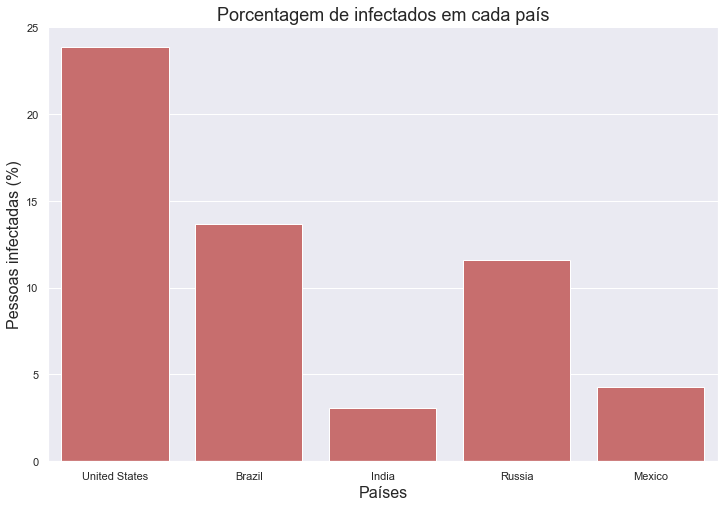

In [144]:
ax = sns.barplot(x=dados_5_paises.index, y="Quantidade de casos (%)", data= dados_5_paises, color="r")
ax.set_xlabel('Países', fontsize = 16)
ax.set_ylabel('Pessoas infectadas (%)', fontsize = 16)
ax.set_title('Porcentagem de infectados em cada país', fontsize = 18)

## Conclusão

#### Analisando os dados é possível obter diversas informações, tanto visualmente pelo gráficos, quanto analisando as tabelas e estatísticas. Um exemplo, a India apesar de ser o país com mais habitantes, é o país que possui o menor numero de mortes por milhão e porcentagem de casos dentre todos os analisados, o que pode indicar que as medidas de proteção e isolamento foram implementadas de forma correta, impedindo a disseminação da doença.
#### Já os Estados Unidos tiveram quase 1/4 da população infectada, o que pode indicar que as medidas de proteção e isolamento não estão sendo seguidas corretamente.
#### Pode-se observar também que boa parte da população já se encontra completamente vacinada, o que ajuda a mitigar a taxa de mortalidade da doença.
#### Existe um detalhe que deve ser observado, neste base de dados tem o número total de casos de cada país, mas não a quantidade total de pessoas infectadas, então não podemos afirmar que cada caso foi de uma pessoa diferente, pois provavelmente algumas pessoas já pegaram a doença mais de uma vez, mas para essa análise vamos considerar que cada pessoa contraiu a doença apenas uma vez.
#### Essas são só algumas informações que pudemos observar, mas muitas outras podem ser retiradas da base de dados, depende apenas do que quer ser observado e assim os dados podem ser filtrados e tratados para obtermos essas informações.